In [1]:
from astro_constants import *
from source_info import *
from parameters import *
from particles import *

Output saved to coronal_parameters.txt
Output appended to coronal_parameters.txt


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.integrate import quad
from astropy import units as u
from astropy import constants as const
from scipy.stats import chisquare
from scipy.optimize import curve_fit

In [3]:
print(f'Coronal Magnetic Field:\n B_c = {B_c:.4E} G')
print(f'Coronal Particle Number Density:\n n_c = {n_c:.4E} cm-3')
print(f'Coronal Temperature:\n T_c = {T_c:.4E} K')
print(f'Width of the current sheet:\n delta_RX = {delta_RX:.4E} cm')
print(f'Reconnection Power:\n wdot_B = {wdot_B:.4E} erg s-1')

Coronal Magnetic Field:
 B_c = 1.0478E+04 G
Coronal Particle Number Density:
 n_c = 3.4392E+10 cm-3
Coronal Temperature:
 T_c = 2.5282E+09 K
Width of the current sheet:
 delta_RX = 1.6649E+11 cm
Reconnection Power:
 wdot_B = 5.9912E+42 erg s-1


In [4]:
rho # [g cm-3]

5.752425625949121e-14

In [5]:
v_a0/c

0.4110983941280743

In [6]:
va/c

0.29069046222286127

In [7]:
delta_RX / R_s

0.028123544459035435

## Leptons

In [8]:
rate_ebremss = rate_bremss_e(n_c, 1, Ee)
rate_IC_X = rate_IC(Ee, eps_x, nph_x)
rate_IC_OUV = rate_IC(Ee, eps_OUV, nph_OUV)

In [9]:
## replace zeros with NaN

rate_ebremss = np.where(rate_ebremss > 0, rate_ebremss, np.nan)
rate_IC_X = np.where(rate_IC_X > 0, rate_IC_X, np.nan)
rate_IC_OUV = np.where(rate_IC_OUV > 0, rate_IC_OUV, np.nan)

In [10]:
t_loss_esynch = 1 / rate_synch(Ee, B_c, me)
t_loss_ebrems = 1 / rate_ebremss
t_loss_IC_X = 1 / rate_IC_X
t_loss_IC_OUV = 1 / rate_IC_OUV

In [11]:
t_loss_ebrems = np.nan_to_num(t_loss_ebrems, nan=np.inf)
t_loss_IC_X = np.nan_to_num(t_loss_IC_X, nan=np.inf)
t_loss_IC_OUV = np.nan_to_num(t_loss_IC_OUV, nan=np.inf)

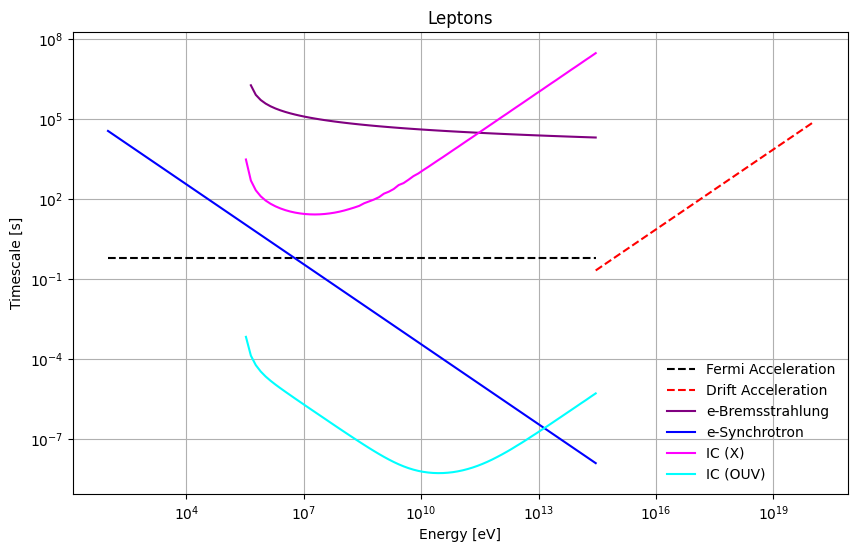

In [12]:
## leptons

plt.figure(figsize=(10, 6))

## acceleration
plt.loglog(Ee/eV,[(me/mp)*t_acc_fermi(va, delta_RX)]*len(Ee),'--', label='Fermi Acceleration', color='black')
plt.loglog(Ee_drift/eV,t_acc_drift(Ee_drift, B_c, va),'--', label='Drift Acceleration', color='red')

## losses
plt.loglog(Ee/eV,t_loss_ebrems,label='e-Bremsstrahlung',color='purple')
plt.loglog(Ee/eV,t_loss_esynch,label='e-Synchrotron',color='blue')
plt.loglog(Ee/eV,t_loss_IC_X,label='IC (X)',color='magenta')
plt.loglog(Ee/eV,t_loss_IC_OUV,label='IC (OUV)',color='cyan')


# plt.xlim((1e9,Ep.max()/eV))
# plt.ylim((1e-11,1e6))

plt.xlabel('Energy [eV]')
plt.ylabel('Timescale [s]')
plt.title('Leptons')

plt.legend(frameon=False,loc='lower right')
plt.savefig('plots/leptons_eV.png',dpi=300)

plt.grid()
plt.show()

## Hadrons

In [13]:
rate_pp = rate_p_p(n_c, Ep)

In [14]:
## replace zeros with NaN

rate_pp = np.where(rate_pp > 0, rate_pp, np.nan)

In [15]:
t_loss_psynch = 1 / rate_synch(Ep, B_c, mp)
t_loss_pp = 1 / rate_pp

In [16]:
t_loss_pp = np.nan_to_num(t_loss_pp, nan=np.inf)

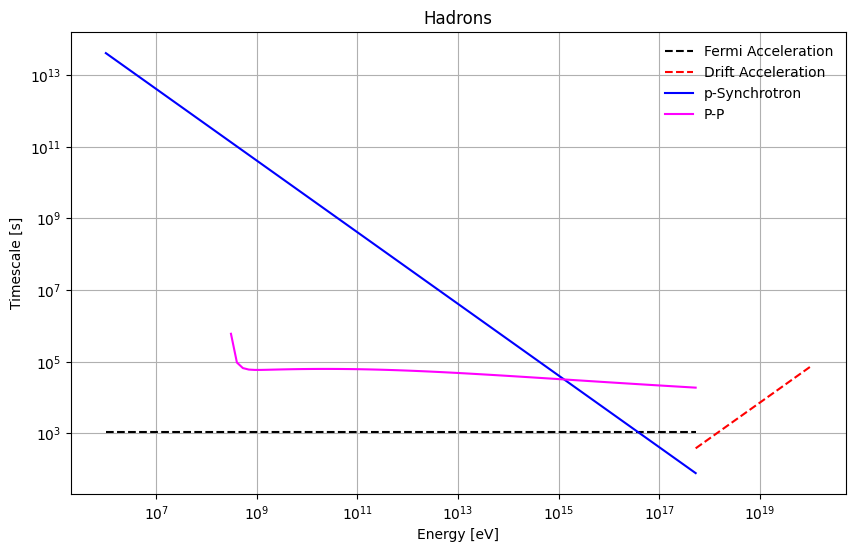

In [23]:
## hadrons

plt.figure(figsize=(10, 6))

## acceleration
plt.loglog(Ep/eV,[t_acc_fermi(va, delta_RX)]*len(Ep),'--', label='Fermi Acceleration',color='black')
plt.loglog(Ep_drift/eV,t_acc_drift(Ep_drift, B_c, va),'--', label='Drift Acceleration',color='red')

## losses
plt.loglog(Ep/eV,t_loss_psynch,label='p-Synchrotron',color='blue')

# Apply the condition for plotting only after 10^8 eV
Ep_filtered = Ep[Ep/eV > 10**(8.37)]
t_loss_pp_filtered = t_loss_pp[Ep/eV > 10**(8.37)]
plt.loglog(Ep_filtered/eV, t_loss_pp_filtered, label='P-P', color='magenta')
# plt.loglog(Ep/eV,t_loss_pp,label='P-P',color='magenta')

# plt.loglog(Ep/eV,rate_p_gamma(Ep, eps_x, nph_x),'--',label='P-gamma (X)',color='magenta')
# plt.loglog(Ep/eV,rate_p_gamma(Ep, eps_OUV, nph_OUV),label='P-gamma (OUV)',color='cyan')
# # plt.loglog(Ep/eV,rate_pg_cool(Ep, eps_x, nph_x),label='P-gamma (X)', color='red')
# # plt.loglog(Ep/eV,rate_pg_cool(Ep, eps_OUV, nph_OUV),label='P-gamma (OUV)',color='blue')

# plt.loglog(Ep/eV,rate_bth_cool(Ep, eps_x, nph_x),label='B-H (X)', color='magenta')
# plt.loglog(Ep/eV,rate_bth_cool(Ep, eps_OUV, nph_OUV),'--',label='B-H (OUV)', color='cyan')

# plt.loglog(Ep/eV,cooling_rate_bth_isotropic,label='B-H (X)',color='orange')
# plt.loglog(Ep/eV,cooling_rate_bth_ou,label='B-H (OUV)',color='purple')

# plt.xlim((1e7,1e20))
# plt.ylim((1e-14,1e11))

plt.xlabel('Energy [eV]')
plt.ylabel('Timescale [s]')
plt.title('Hadrons')

plt.legend(frameon=False,loc='upper right')
# plt.xticks([1e9,1e10,1e11,1e12,1e13,1e14,1e15],labels=['9','10','11','12','13','14','15'])
plt.savefig('plots/hadrons_eV.png',dpi=300)

plt.grid()
plt.show()